In [1]:
%matplotlib inline
import math
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import chardet
import io
from sklearn import preprocessing
import numpy as np
from sklearn.preprocessing import FunctionTransformer
import numpy as np
from sklearn.preprocessing import power_transform
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
from collections import defaultdict
from scipy.stats.stats import pearsonr
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.linear_model import RidgeCV, LassoCV, Ridge, Lasso
from sklearn.cluster import DBSCAN
from sklearn import datasets 
from sklearn.preprocessing import StandardScaler 
from sklearn.cluster import DBSCAN 
from sklearn.metrics import pairwise_distances 
from sklearn.neighbors import NearestNeighbors 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import metrics  

#### Reinserire percorso dataset!!!

In [2]:
df = pd.read_csv(r'/Users/mario/Documents/UNIPI/DataMining1/Project/Train_HR_Employee_Attrition.csv')
#df = pd.read_csv(r'file:/Users/AlessandroVavala/Desktop/Alessandro/Università/UniPi/Data Mining/DatasetProject1/Train_HR_Employee_Attrition.csv')

## Preparativi

In [3]:
#MonthlyIncome
df['MonthlyIncome'] = df['MonthlyIncome'].fillna(df.groupby('JobRole')['MonthlyIncome'].transform('mean'))
#Age
df['Age'] = df['Age'].fillna(df.groupby('JobRole')['Age'].transform('mean'))
#Over18
df["Over18"].fillna("Y", inplace = True) 
#Gender
df["Gender"].fillna("Male", inplace = True)
#BusinessTravel
df["BusinessTravel"].fillna("Travel_Rarely", inplace = True)
#StandardHours
df["StandardHours"].fillna(float("80.0"), inplace = True)
#PerformanceRating
df['PerformanceRating'] = df.groupby(['JobRole'], sort=False)['PerformanceRating'].apply(lambda x: x.fillna(x.mode().iloc[0])) 
#TRAININGLASTYEAR
df['TrainingTimesLastYear'] = df['TrainingTimesLastYear'].fillna(df.groupby('JobRole')['TrainingTimesLastYear'].transform('mean'))
#YEARS AT COMPANY
df['YearsAtCompany'] = df['YearsAtCompany'].fillna(df.groupby('JobRole')['YearsAtCompany'].transform('mean'))
df.round({"Age" : 0 , "MonthlyIncome": 2 , "TrainingTimesLastYear" : 0 , "YearsAtCompany" : 0  })

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,52.0,No,Travel_Rarely,593,Research & Development,9,4,Medical,2,Male,...,3,80.0,0,20,2.0,2,8.0,7,2,13
1,36.0,No,Travel_Rarely,1218,Research & Development,1,1,Life Sciences,2,Male,...,3,80.0,1,21,3.0,3,1.0,8,1,6
2,37.0,No,Travel_Frequently,530,Sales,16,3,Life Sciences,3,Male,...,3,80.0,1,7,4.0,3,1.0,5,1,2
3,33.0,No,Travel_Rarely,953,Research & Development,5,4,Technical Degree,2,Male,...,2,80.0,0,12,1.0,3,3.0,7,0,7
4,37.0,No,Travel_Rarely,1380,Research & Development,9,2,Life Sciences,3,Female,...,3,80.0,0,2,3.0,3,10.0,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1171,37.0,No,Travel_Rarely,1123,Research & Development,16,2,Medical,4,Female,...,2,80.0,2,1,3.0,2,17.0,0,0,0
1172,33.0,Yes,Non-Travel,249,Sales,6,4,Life Sciences,2,Female,...,2,80.0,0,12,2.0,2,11.0,7,7,7
1173,33.0,No,Travel_Rarely,583,Sales,4,1,Marketing,3,Male,...,1,80.0,0,5,2.0,4,3.0,2,0,3
1174,45.0,No,Non-Travel,1174,Sales,3,4,Marketing,1,Male,...,4,80.0,0,15,2.0,3,10.0,4,0,1


In [4]:
#OUTLIERS FOR MonthlyIncome
"""SD MonthlyIncome"""
MonthlyIncome_std = df ['MonthlyIncome'].std()
MonthlyIncome_std
"""MEAN MonthlyIncome"""
MonthlyIncome_mean = df ['MonthlyIncome'].mean()
MonthlyIncome_mean
threshold = 3
outlier = [] 
for i in df ['MonthlyIncome']: 
    z = (i-MonthlyIncome_mean)/MonthlyIncome_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.MonthlyIncome.isin(outlier)]

#OUTLIERS FOR TotalWorkingYears
"""SD TotalWorkingYears"""
TotalWorkingYears_std = df ['TotalWorkingYears'].std()
"""MEAN TotalWorkingYears"""
TotalWorkingYears_mean = df ['TotalWorkingYears'].mean()
threshold = 3
outlier = [] 
for i in df ['TotalWorkingYears']: 
    z = (i-TotalWorkingYears_mean)/TotalWorkingYears_std 
    if z >= threshold: 
        outlier.append(i)
        df = df[~df.TotalWorkingYears.isin(outlier)]

#OUTLIERS FOR YearsAtCompany
"""SD YearsAtCompany"""
YearsAtCompany_std = df ['YearsAtCompany'].std()
"""MEAN YearsAtCompany"""
YearsAtCompany_mean = df ['YearsAtCompany'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsAtCompany']: 
    z = (i-YearsAtCompany_mean)/YearsAtCompany_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsAtCompany.isin(outlier)]

#OUTLIERS FOR YearsInCurrentRole
"""SD YearsInCurrentRole"""
YearsInCurrentRole_std = df ['YearsInCurrentRole'].std()
"""MEAN YearsInCurrentRole"""
YearsInCurrentRole_mean = df ['YearsInCurrentRole'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsInCurrentRole']: 
    z = (i-YearsInCurrentRole_mean)/YearsInCurrentRole_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsInCurrentRole.isin(outlier)]
 
#OUTLIERS FOR YearsSinceLastPromotion
"""SD YearsSinceLastPromotion"""
YearsSinceLastPromotion_std = df ['YearsSinceLastPromotion'].std()
"""MEAN YearsSinceLastPromotion"""
YearsSinceLastPromotion_mean = df ['YearsSinceLastPromotion'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsSinceLastPromotion']: 
    z = (i-YearsSinceLastPromotion_mean)/YearsSinceLastPromotion_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsSinceLastPromotion.isin(outlier)]
 
#OUTLIERS FOR YearsWithCurrManager
"""SD YearsWithCurrManager"""
YearsWithCurrManager_std = df ['YearsWithCurrManager'].std()
"""MEAN YearsWithCurrManager"""
YearsWithCurrManager_mean = df ['YearsWithCurrManager'].mean()
threshold = 3
outlier = [] 
for i in df ['YearsWithCurrManager']: 
    z = (i-YearsWithCurrManager_mean)/YearsWithCurrManager_std 
    if z >= threshold: 
        outlier.append(i) 
        df = df[~df.YearsWithCurrManager.isin(outlier)]

In [5]:
print('Numero outlier rimossi: ', 1176 - len(df))
len(df)

Numero outlier rimossi:  97


1079

In [6]:
#Convertiamo Attrition 
df['Attrition'] = df['Attrition'].map({'Yes': 1, 'No': 0})
df['BusinessTravel'] = df['BusinessTravel'].map({'Non-Travel': 0, 'Travel_Rarely': 1, 'Travel_Frequently': 2})
df['OverTime'] = df['OverTime'].map({'Yes': 1, 'No':0})
# Encoding categorical variables
df = pd.get_dummies(df, columns=['MaritalStatus'])

In [7]:
#Prima creo un df solo con gli attributi numerici
num_df = df.select_dtypes(exclude=['object'])
 
#Codice per ZSCORE - STANDARDIZZAZIONE 
stand_data = StandardScaler().fit(num_df)
stand_data = stand_data.transform(num_df)
stand_data = pd.DataFrame(num_df)
stand_data.columns = ['Age', 'Attrition' , 'BusinessTravel', 'DailyRate' , 'DistanceFromHome' , 'Education', 'EnvironmentSatisfaction' , 'HourlyRate', 'JobInvolvement' , 'JobLevel', 'JobSatisfaction', 'MonthlyIncome' , 'MonthlyRate' , 'NumCompaniesWorked' , 'OverTime' , 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction','StandardHours','StockOptionLevel','TotalWorkingYears','TrainingTimesLastYear','WorkLifeBalance', 'YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager', 'MaritalStatus_Divorced', 'MaritalStatus_Married', 'MaritalStatus_Single']
df = stand_data

#Errore! L'ultimo stand_data non è standardizzato. stand_data = pd.DataFrame(stand_data) è corretto

In [8]:
df = df.drop(columns = 'StandardHours')
df = df.drop(columns = 'HourlyRate')
df = df.drop(columns = 'DailyRate')
df = df.drop(columns = 'MonthlyRate')
df = df.drop(columns = 'BusinessTravel')
df = df.drop(columns = 'Education')
df = df.drop(columns = 'YearsInCurrentRole')
df = df.drop(columns = 'JobLevel')

# K-Means

## K-Means (Age, MonthlyIncome)

In [9]:
dk = df[['Age','MonthlyIncome']]
dk_scaled = dk

dk_scaled.head(5)

,Age,MonthlyIncome
0,52.000000,8446.0
1,36.000000,4834.0
2,36.674419,4768.0
3,33.000000,2799.0
4,37.417582,7978.0


#### Ricerca di K

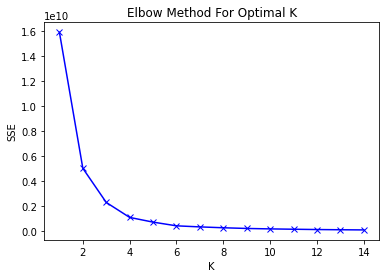

In [10]:
#Elbow method

sse = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dk_scaled)
    sse.append(km.inertia_)
    
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

In [11]:
#Silhouette metric

k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(dk_scaled)
    labels_k = kmeans.labels_
    score_k = metrics.silhouette_score(dk_scaled, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))

Tested kMeans with k = 2	SS: 0.6956
Tested kMeans with k = 3	SS: 0.5993
Tested kMeans with k = 4	SS: 0.6431
Tested kMeans with k = 5	SS: 0.6241
Tested kMeans with k = 6	SS: 0.6464
Tested kMeans with k = 7	SS: 0.6403
Tested kMeans with k = 8	SS: 0.6147
Tested kMeans with k = 9	SS: 0.6135
Tested kMeans with k = 10	SS: 0.6073
Tested kMeans with k = 11	SS: 0.5820
Tested kMeans with k = 12	SS: 0.5799
Tested kMeans with k = 13	SS: 0.5807
Tested kMeans with k = 14	SS: 0.5831
Tested kMeans with k = 15	SS: 0.5821
Tested kMeans with k = 16	SS: 0.6077
Tested kMeans with k = 17	SS: 0.6045
Tested kMeans with k = 18	SS: 0.6115
Tested kMeans with k = 19	SS: 0.6127
Tested kMeans with k = 20	SS: 0.6092
Tested kMeans with k = 21	SS: 0.6031
Tested kMeans with k = 22	SS: 0.6034
Tested kMeans with k = 23	SS: 0.5911
Tested kMeans with k = 24	SS: 0.5892


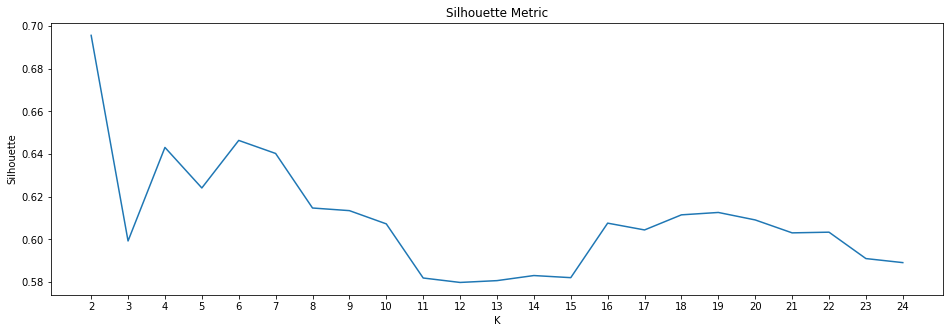

In [12]:
#Visualizziamo la silhouette

sil_scores = list(silhouette_scores.values())

plt.figure(figsize = (16,5))
plt.plot(sil_scores)
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()


In [13]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-13-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-13-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [14]:
cc0 = 0
cc1 = 0
cc2 = 0
cc3 = 0
for i in dk_scaled['label']:
    if i == 0:
        cc0 += 1
    elif i == 1:
        cc1 += 1
    elif i == 2:
        cc2 += 1
    elif i == 3:
        cc3 += 1
        
print(cc0,cc1,cc2,cc3)

489 60 394 136


In [15]:
centroids 

array([[   36.89743566,  6195.81846483],
       [   45.57130799, 17378.51666667],
       [   33.9531381 ,  2963.98727735],
       [   40.6374374 , 11021.82481752]])

In [16]:
#Per visualizzare k-means 

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

In [17]:
#Funzione per jitter

def rand_jitter(arr):
    stdev = .04*(max(arr)-min(arr))
    return arr + np.random.randn(len(arr)) * stdev

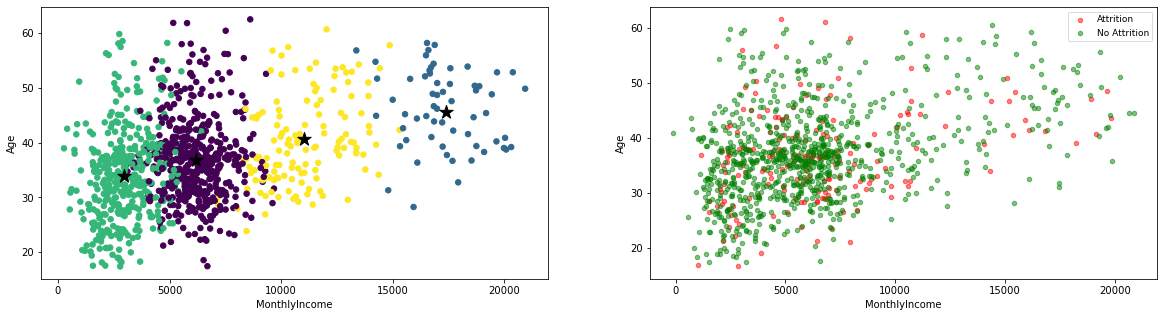

In [18]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(dk_scaled['MonthlyIncome']), rand_jitter(dk_scaled['Age']), c=kmeans.labels_, s=30)
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylabel('Age')
plt.xlabel('MonthlyIncome')
plt.scatter(centroids[:,1], centroids[:,0], s=200, marker='*', c='k')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 1]), rand_jitter(dk['Age'].loc[df['Attrition'] == 1]), s = 20, c = 'red',alpha =0.5, label = 'Attrition')
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 0]), rand_jitter(dk['Age'].loc[df['Attrition'] == 0]), s = 20, c = 'green',alpha =0.5, label = 'No Attrition')
plt.ylabel('Age')
plt.xlabel('MonthlyIncome')
plt.legend(fontsize = 9, framealpha=0.7)


plt.show()

## K-Means (TotalWorkingYears, MonthlyIncome)

In [19]:
dk = df[['TotalWorkingYears','MonthlyIncome']]
dk_scaled = dk

dk_scaled.head(5)

,TotalWorkingYears,MonthlyIncome
0,20,8446.0
1,21,4834.0
2,7,4768.0
3,12,2799.0
4,2,7978.0


In [20]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-20-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-20-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [21]:
centroids

array([[9.79345603e+00, 6.19581846e+03],
       [1.02333333e+01, 1.73785167e+04],
       [1.03333333e+01, 2.96398728e+03],
       [1.12262774e+01, 1.10218248e+04]])

In [22]:
#Per visualizzare k-means 

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

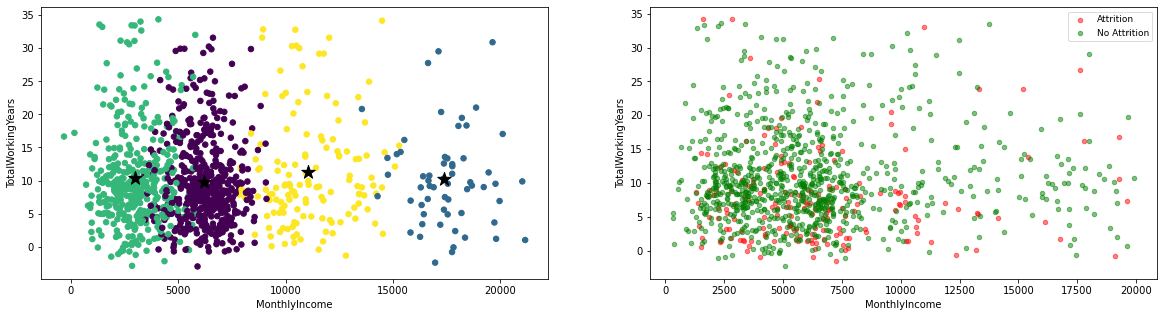

In [23]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(dk_scaled['MonthlyIncome']), rand_jitter(dk_scaled['TotalWorkingYears']), c=kmeans.labels_, s=30)
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylabel('TotalWorkingYears')
plt.xlabel('MonthlyIncome')
plt.scatter(centroids[:,1], centroids[:,0], s=200, marker='*', c='k')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 1]), rand_jitter(dk['TotalWorkingYears'].loc[df['Attrition'] == 1]), s = 20, c = 'red',alpha =0.5, label = 'Attrition')
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 0]), rand_jitter(dk['TotalWorkingYears'].loc[df['Attrition'] == 0]), s = 20, c = 'green',alpha =0.5, label = 'No Attrition')
plt.ylabel('TotalWorkingYears')
plt.xlabel('MonthlyIncome')
plt.legend(fontsize = 9, framealpha=0.7)

plt.show()

## K-Means (YearsWithCurrManager, MonthlyIncome)

In [24]:
dk = df[['YearsWithCurrManager','MonthlyIncome']]
dk_scaled = dk

dk_scaled.head(5)

,YearsWithCurrManager,MonthlyIncome
0,13,8446.0
1,6,4834.0
2,2,4768.0
3,7,2799.0
4,1,7978.0


In [25]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-25-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-25-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [26]:
centroids

array([[3.57668712e+00, 6.19581846e+03],
       [3.58333333e+00, 1.73785167e+04],
       [3.98727735e+00, 2.96398728e+03],
       [4.16788321e+00, 1.10218248e+04]])

In [27]:
#Per visualizzare k-means 

#sns.pairplot(data = dk_scaled, hue = "label", palette = "Accent_r")
#plt.show()

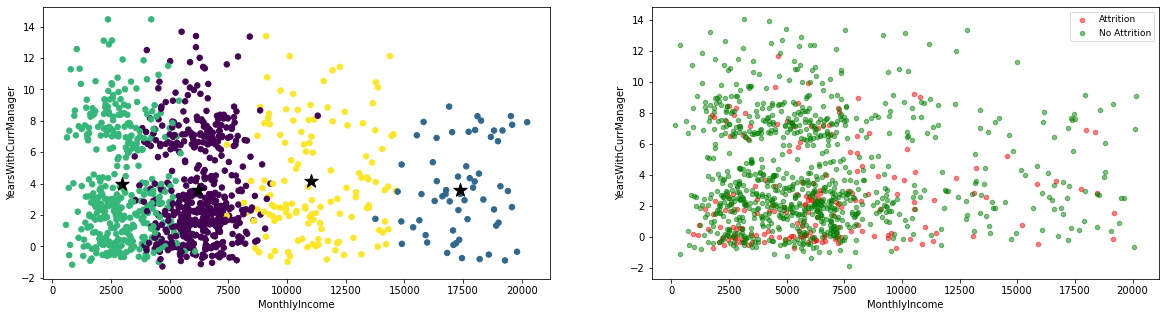

In [28]:
fig = plt.figure(figsize=(20, 5)) 
fig_dims = (1, 2)

plt.subplot2grid(fig_dims, (0, 0))
plt.scatter(rand_jitter(dk_scaled['MonthlyIncome']), rand_jitter(dk_scaled['YearsWithCurrManager']), c=kmeans.labels_, s=30)
#plt.tick_params(axis='both', which='major', labelsize=22)
plt.ylabel('YearsWithCurrManager')
plt.xlabel('MonthlyIncome')
plt.scatter(centroids[:,1], centroids[:,0], s=200, marker='*', c='k')

plt.subplot2grid(fig_dims, (0, 1))
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 1]), rand_jitter(dk['YearsWithCurrManager'].loc[df['Attrition'] == 1]), s = 20, c = 'red',alpha =0.5, label = 'Attrition')
plt.scatter(rand_jitter(dk['MonthlyIncome'].loc[df['Attrition'] == 0]), rand_jitter(dk['YearsWithCurrManager'].loc[df['Attrition'] == 0]), s = 20, c = 'green',alpha =0.5, label = 'No Attrition')
plt.ylabel('YearsWithCurrManager')
plt.xlabel('MonthlyIncome')
plt.legend(fontsize = 9, framealpha=0.7)

plt.show()

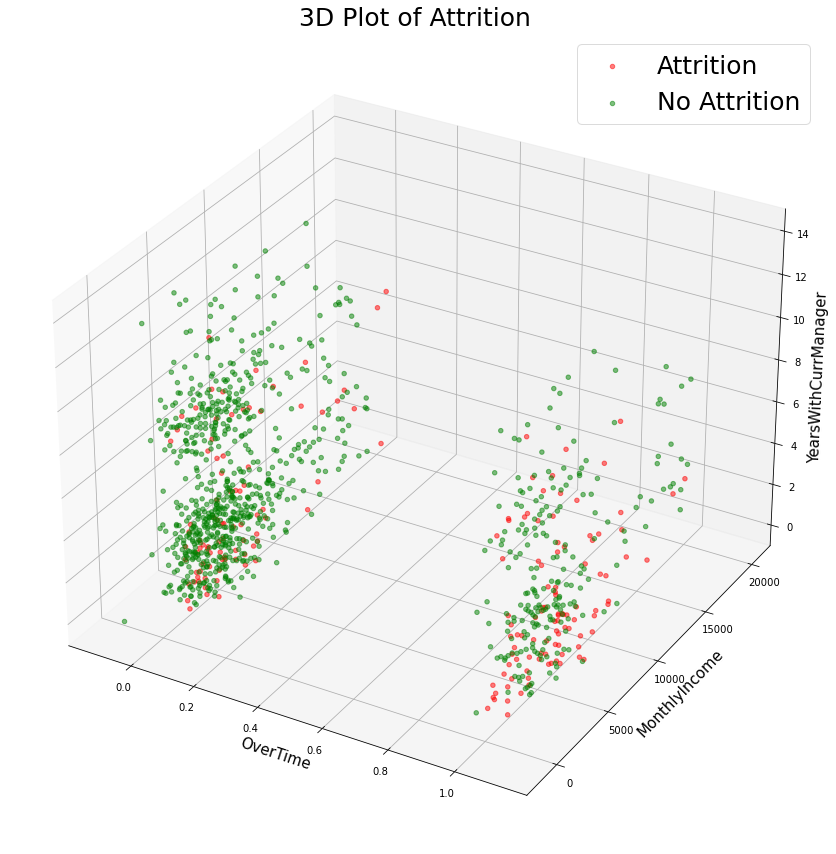

In [29]:
fig = plt.figure(figsize=(15, 15))
ax = fig.add_subplot(111, projection='3d')

ax.scatter(rand_jitter(df['OverTime'].loc[df['Attrition'] == 1]),rand_jitter(dk_scaled['MonthlyIncome'].loc[df['Attrition'] == 1]),dk_scaled['YearsWithCurrManager'].loc[df['Attrition'] == 1], s = 20, c = 'red',alpha =0.5, label = 'Attrition')
ax.scatter(rand_jitter(df['OverTime'].loc[df['Attrition'] == 0]),rand_jitter(dk_scaled['MonthlyIncome'].loc[df['Attrition'] == 0]),dk_scaled['YearsWithCurrManager'].loc[df['Attrition'] == 0], s = 20, c = 'green',alpha =0.5, label = 'No Attrition')

ax.set_xlabel('OverTime', fontsize=15)
ax.set_ylabel('MonthlyIncome',fontsize=15)
ax.set_zlabel('YearsWithCurrManager',fontsize=15)
plt.legend(fontsize = 25, framealpha=0.7)
plt.title('3D Plot of Attrition',fontsize=25)

plt.show()

### Grafici utili per il report

In [30]:
dk = df[['Age','MonthlyIncome','TotalWorkingYears','YearsWithCurrManager']]
dk_scaled = dk

dk_scaled.head(5)

,Age,MonthlyIncome,TotalWorkingYears,YearsWithCurrManager
0,52.000000,8446.0,20,13
1,36.000000,4834.0,21,6
2,36.674419,4768.0,7,2
3,33.000000,2799.0,12,7
4,37.417582,7978.0,2,1


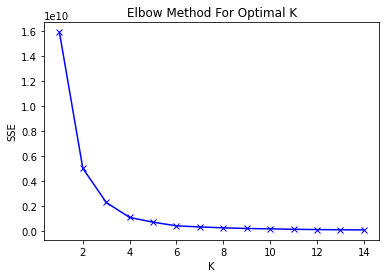

In [31]:
#Elbow method

sse = []
K = range(1,15)
for k in K:
    km = KMeans(n_clusters=k)
    km = km.fit(dk_scaled)
    sse.append(km.inertia_)
    
plt.plot(K, sse, 'bx-')
plt.xlabel('K')
plt.ylabel('SSE')
plt.title('Elbow Method For Optimal K')
plt.show()

In [32]:
#Silhouette metric

k_to_test = range(2,25,1) # [2,3,4, ..., 24]
silhouette_scores = {}

for k in k_to_test:
    kmeans = KMeans(n_clusters = k, random_state=123)
    kmeans.fit(dk_scaled)
    labels_k = kmeans.labels_
    score_k = metrics.silhouette_score(dk_scaled, labels_k)
    silhouette_scores[k] = score_k
    print("Tested kMeans with k = %d\tSS: %5.4f" % (k, score_k))

Tested kMeans with k = 2	SS: 0.6956
Tested kMeans with k = 3	SS: 0.5993
Tested kMeans with k = 4	SS: 0.6427
Tested kMeans with k = 5	SS: 0.6240
Tested kMeans with k = 6	SS: 0.6462
Tested kMeans with k = 7	SS: 0.6407
Tested kMeans with k = 8	SS: 0.6143
Tested kMeans with k = 9	SS: 0.6140
Tested kMeans with k = 10	SS: 0.6068
Tested kMeans with k = 11	SS: 0.5815
Tested kMeans with k = 12	SS: 0.5791
Tested kMeans with k = 13	SS: 0.5798
Tested kMeans with k = 14	SS: 0.5849
Tested kMeans with k = 15	SS: 0.5811
Tested kMeans with k = 16	SS: 0.6066
Tested kMeans with k = 17	SS: 0.6034
Tested kMeans with k = 18	SS: 0.6114
Tested kMeans with k = 19	SS: 0.6114
Tested kMeans with k = 20	SS: 0.6095
Tested kMeans with k = 21	SS: 0.6016
Tested kMeans with k = 22	SS: 0.6016
Tested kMeans with k = 23	SS: 0.5897
Tested kMeans with k = 24	SS: 0.5925


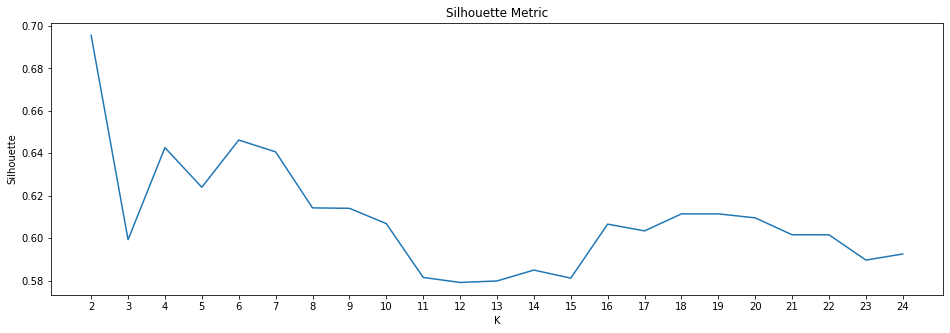

In [34]:
#Visualizziamo la silhouette

sil_scores = list(silhouette_scores.values())

plt.figure(figsize = (16,5))
plt.plot(sil_scores)
plt.xticks(range(0,23,1), silhouette_scores.keys())
plt.title("Silhouette Metric")
plt.xlabel("K")
plt.ylabel("Silhouette")
plt.show()


In [35]:
kmeans = KMeans(n_clusters = 4, max_iter=5000, random_state=123)
kmeans.fit(dk_scaled)
centroids = kmeans.cluster_centers_
dk_scaled['label'] = kmeans.labels_
dk['label'] = kmeans.labels_

<ipython-input-35-9cb795876cd2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk_scaled['label'] = kmeans.labels_
<ipython-input-35-9cb795876cd2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dk['label'] = kmeans.labels_


In [36]:
#Facciamo il logaritmo per presentarli graficamente 

centroids = np.log(centroids, dtype='float64')

centroids

array([[3.52603243, 7.99841261, 2.33243806, 1.38123106],
       [3.70854688, 9.31250354, 2.43125394, 1.43188111],
       [3.60730303, 8.73562027, 2.28066981, 1.27500858],
       [3.81927831, 9.76299005, 2.32565037, 1.27629347]])

ValueError: The number of FixedLocator locations (4), usually from a call to set_ticks, does not match the number of ticklabels (5).

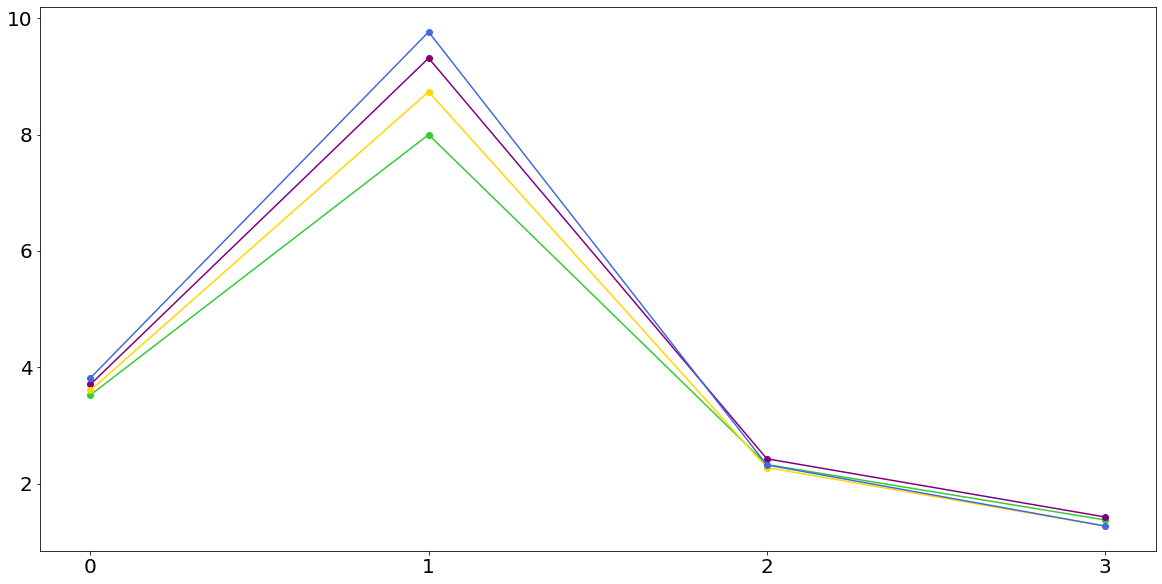

In [37]:
#Visualization of clusters centers by means of parallel coordinates

#Attenzione a fare un run solo, altrimenti cerca altri centers e cambia il grafico

fig = plt.figure(figsize=(20, 10)) 
fig_dims = (1, 1)

# Plot 
plt.subplot2grid(fig_dims, (0, 0))
plt.plot(centroids[0,:], marker='o', label='Cluster 1', color = 'limegreen')
plt.plot(centroids[1,:], marker='o', label='Cluster 2', color = 'purple')
plt.plot(centroids[2,:], marker='o', label='Cluster 3', color = 'gold')
plt.plot(centroids[3,:], marker='o', label='Cluster 4', color = 'royalblue')
plt.tick_params(axis='both', which='major', labelsize=20)
plt.xticks(range(0, len(dk_scaled.columns)-1), dk_scaled.columns, fontsize=15)
plt.legend(fontsize=20)
plt.show()